# 23차시: 딥러닝 기초 - 시계열 예측 모델 LSTM 이해하기

## 학습 목표
- 딥러닝과 신경망의 기본 개념 이해
- RNN (Recurrent Neural Network)의 원리 학습
- LSTM (Long Short-Term Memory)의 구조와 장점 이해
- TensorFlow/Keras 기초 사용법 익히기

## 학습 내용
1. 딥러닝 기초
2. RNN의 원리
3. LSTM 구조
4. TensorFlow/Keras 기초
5. 간단한 LSTM 예제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

---
## 1. 딥러닝 기초

### 딥러닝이란?
**딥러닝(Deep Learning)**: 여러 층의 인공신경망을 사용하여 복잡한 패턴을 학습하는 머신러닝의 한 분야

### 머신러닝 vs 딥러닝
| 구분 | 머신러닝 | 딥러닝 |
|------|----------|--------|
| 특성 추출 | 수동 (사람이 설계) | 자동 (모델이 학습) |
| 데이터 양 | 적은 데이터도 가능 | 대량 데이터 필요 |
| 계산 자원 | CPU 가능 | GPU 권장 |
| 해석력 | 높음 | 낮음 (블랙박스) |

### 신경망 구조
```
입력층          은닉층(들)         출력층
[x1] ─┐      ┌─[h1]─┐      ┌─[y1]
[x2] ─┼──────┼─[h2]─┼──────┤
[x3] ─┘      └─[h3]─┘      └─[y2]

활성화 함수: ReLU, Sigmoid, Tanh 등
```

---
## 2. RNN (Recurrent Neural Network)의 원리

### 왜 시계열에 RNN?
- 일반 신경망은 입력 간 **순서**를 고려하지 않음
- 주가는 **시간 순서**가 중요 (어제 가격 → 오늘 가격 → 내일 가격)
- RNN은 **이전 시점의 정보를 기억**하면서 학습

### RNN 구조
```
시간 t-2      시간 t-1      시간 t
[x(t-2)] → [h(t-2)] → [x(t-1)] → [h(t-1)] → [x(t)] → [h(t)] → [y]
              ↑                      ↑                   ↑
          이전 정보              이전 정보           최종 출력
          (hidden state)
```

### RNN의 한계: 장기 의존성 문제
- 오래 전 정보가 점점 희미해짐 (Vanishing Gradient)
- 예: 30일 전 주가가 오늘에 영향을 미치기 어려움
- **해결책 → LSTM**

---
## 3. LSTM (Long Short-Term Memory)

### LSTM이란?
- RNN의 장기 의존성 문제를 해결한 모델
- **게이트(Gate)** 메커니즘으로 정보를 선택적으로 기억/망각
- 시계열 예측(주가, 날씨 등)에 널리 사용

### LSTM 게이트 구조
```
1. Forget Gate (망각 게이트): 이전 정보 중 버릴 것 결정
2. Input Gate (입력 게이트): 새 정보 중 저장할 것 결정
3. Output Gate (출력 게이트): 현재 출력할 것 결정
4. Cell State: 장기 기억 저장소
```

### LSTM vs RNN
| 구분 | RNN | LSTM |
|------|-----|------|
| 장기 기억 | 어려움 | 가능 |
| 구조 | 단순 | 복잡 (게이트) |
| 학습 속도 | 빠름 | 느림 |
| 성능 | 짧은 시퀀스 | 긴 시퀀스에 우수 |

---
## 4. TensorFlow/Keras 기초

### Keras란?
- TensorFlow 위에서 동작하는 고수준 딥러닝 API
- 직관적이고 간결한 코드로 모델 구축 가능

### Keras 기본 패턴
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. 모델 구조 정의
model = Sequential([
    LSTM(units=50, input_shape=(시퀀스길이, 특성수)),
    Dense(units=1)
])

# 2. 컴파일
model.compile(optimizer='adam', loss='mse')
# 3. 학습
model.fit(X_train, y_train, epochs=50)
# 4. 예측
y_pred = model.predict(X_test)
```

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

print("[TensorFlow/Keras 버전]")
print("=" * 50)
print(f"TensorFlow: {tf.__version__}")

[TensorFlow/Keras 버전]
TensorFlow: 2.19.0


---
## 5. 간단한 LSTM 예제

사인파(Sin Wave) 데이터로 LSTM의 시계열 예측 능력을 확인합니다.

[사인파 데이터]
데이터 길이: 1000


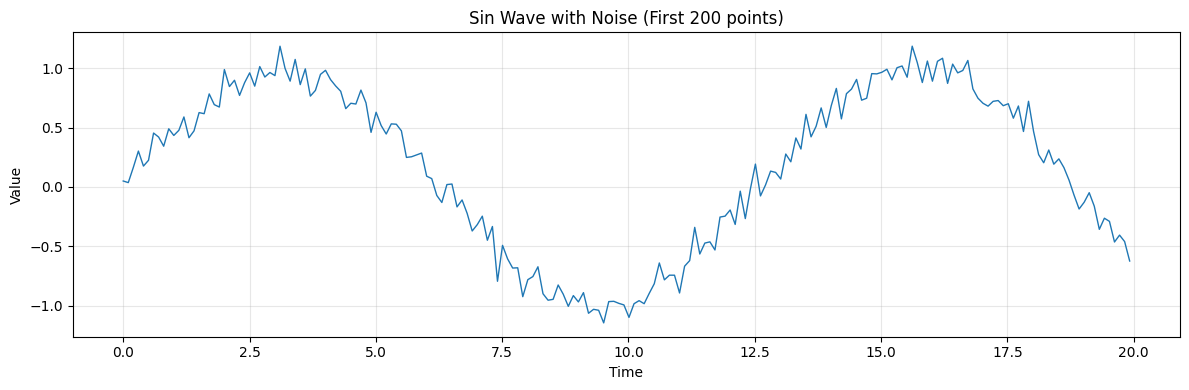

In [7]:
# 사인파 데이터 생성
np.random.seed(42)

# 시간 축
t = np.linspace(0, 100, 1000)
# 사인파 + 노이즈
data = np.sin(t * 0.5) + np.random.randn(1000) * 0.1

print("[사인파 데이터]")
print("=" * 50)
print(f"데이터 길이: {len(data)}")

# 시각화
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t[:200], data[:200], linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Sin Wave with Noise (First 200 points)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    """
    시계열 데이터를 LSTM 입력 형태로 변환
    seq_length 개의 과거 데이터로 다음 값을 예측
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 시퀀스 길이 설정
SEQ_LENGTH = 20  # 과거 20개 데이터로 다음 값 예측

X, y = create_sequences(data, SEQ_LENGTH)
X = X.reshape(-1, SEQ_LENGTH, 1)  # (samples, timesteps, features)

print("[시퀀스 데이터 생성]")
print("=" * 50)
print(f"X shape: {X.shape} (샘플수, 시퀀스길이, 특성수)")
print(f"y shape: {y.shape}")

[시퀀스 데이터 생성]
X shape: (980, 20, 1) (샘플수, 시퀀스길이, 특성수)
y shape: (980,)


In [9]:
# 학습/테스트 분할
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"학습 데이터: {len(X_train)}개")
print(f"테스트 데이터: {len(X_test)}개")

학습 데이터: 784개
테스트 데이터: 196개


In [10]:
# LSTM 모델 구축
model = Sequential([
    LSTM(units=32, input_shape=(SEQ_LENGTH, 1)),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

print("[LSTM 모델]")
print("=" * 50)
model.summary()

[LSTM 모델]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 모델 학습
print("\n[모델 학습]")
print("=" * 50)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


[모델 학습]
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2694 - val_loss: 0.0659
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0721 - val_loss: 0.0461
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0412 - val_loss: 0.0306
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0277 - val_loss: 0.0182
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0173 - val_loss: 0.0117
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0128 - val_loss: 0.0108
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - val_loss: 0.0111
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - val_loss: 0.0108
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - val_loss: 0.0107
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - val_loss: 0.0118
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - 

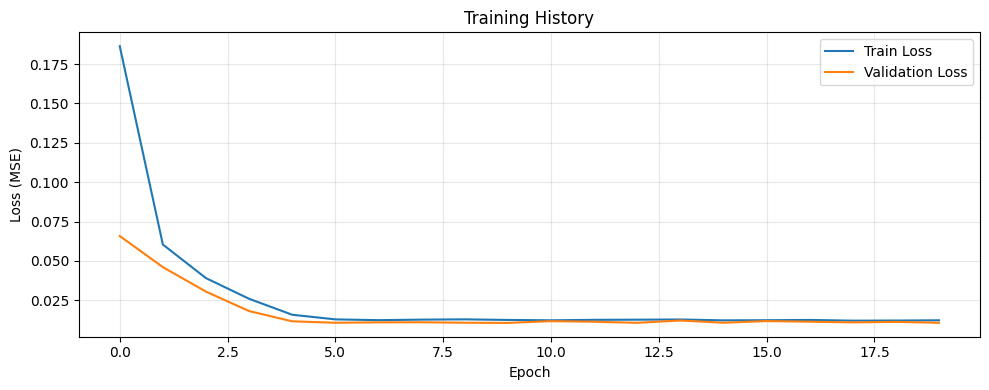

In [12]:
# 학습 곡선
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
ax.set_title('Training History')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# 예측 및 평가
y_pred = model.predict(X_test).flatten()

mse = np.mean((y_test - y_pred) ** 2)
print(f"[테스트 결과] MSE: {mse:.6f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[테스트 결과] MSE: 0.010994


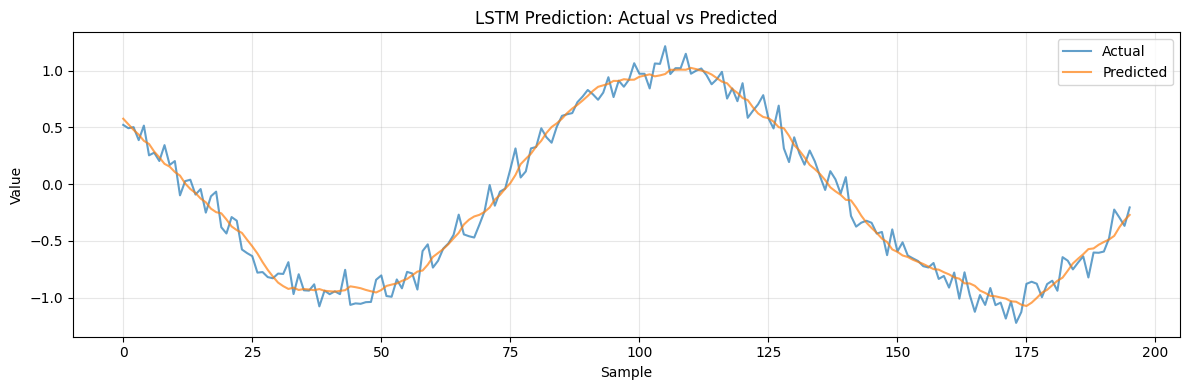

In [17]:
plt.figure(figsize=(12, 4))

plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)

plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('LSTM Prediction: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 학습 정리

### 1. RNN과 LSTM
| 구분 | RNN | LSTM |
|------|-----|------|
| 장기 기억 | 어려움 | 가능 (Cell State) |
| 게이트 | 없음 | Forget/Input/Output |
| 사용처 | 짧은 시퀀스 | 긴 시퀀스, 주가 예측 |

### 2. Keras 기본 패턴
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(units=50, input_shape=(seq_len, features)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50)
```

### 3. 데이터 준비
- 시퀀스 형태로 변환: `(samples, timesteps, features)`
- 정규화 권장 (0~1 또는 표준화)

### 4. 주의사항
- 충분한 데이터 필요
- 과적합 주의 (Dropout 활용)
- 하이퍼파라미터 튜닝 중요

---

### 다음 차시 예고
- 24차시: [실습] LSTM 모델을 활용한 주가 예측
  - 실제 삼성전자 주가 데이터 사용
  - 데이터 전처리 및 스케일링
  - 모델 학습 및 예측